# PyVIF: Python Virus Integration Finder

PyVIF detects integration site of virus in human genome using capture pacbio.

Mappings on human genome and virus genome(s) are necessary using [Minimap2](https://github.com/lh3/minimap2).
For instance on hg38:
```
minimap2 -t 8 \
         -La -x map-pb hg38.fasta subreads.fastq \
         | samtools sort -@ 7 \
         -o human.bam \
         && samtools index human.bam
```

Now, these two mapping are analysed using PyVIF.

In [1]:
from pyvif import bamtools, paftools

## Show basic metrics

#### Read the virus bam file

In [2]:
virus_df = bamtools.bam_to_paf("virus.bam", add_unmapped=True)
virus_paf = paftools.PAF(virus_df)

2018-08-10 13:45:08 - INFO     Scanning input file. Please wait.
2018-08-10 13:45:08 - INFO     Input file contains valid 1257 alignments.


#### Plot read lengths

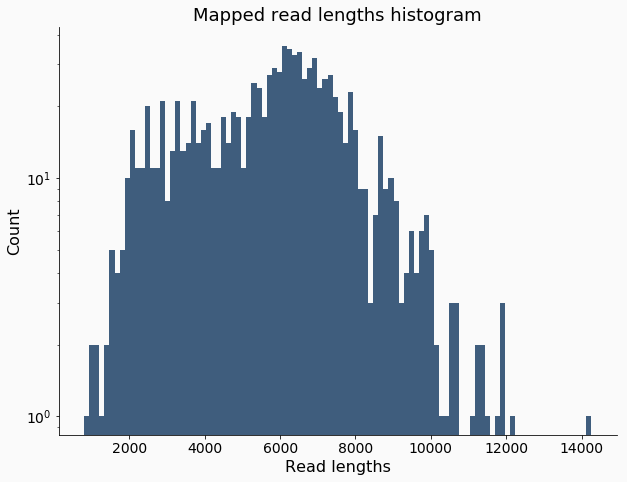

In [3]:
virus_paf.plot_length()

#### Plot number of pass

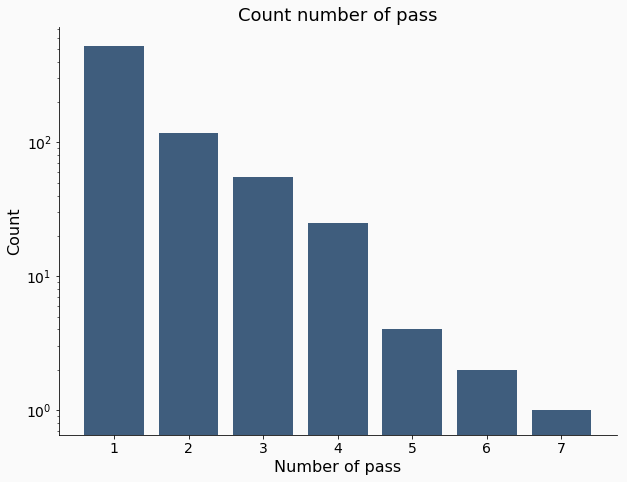

In [4]:
virus_paf.plot_number_pass()

## Find breakpoints

In [5]:
from pyvif import bp_finder

In [6]:
bp_found = bp_finder.BreakpointFinder(human="human.bam", virus="virus.bam")

2018-08-10 13:45:10 - INFO     Scanning input file. Please wait.
2018-08-10 13:45:10 - INFO     Input file contains valid 1116 alignments.
2018-08-10 13:45:10 - INFO     Scanning input file. Please wait.
2018-08-10 13:45:10 - INFO     Input file contains valid 1257 alignments.
2018-08-10 13:45:10 - INFO     Breakpoint research is running...
2018-08-10 13:45:11 - INFO     1079 breakpoints are found.


By the way, you could use the previous `virus_df`. Do not forget to remove unmapped reads with `dropna()` method.

In [7]:
bp_found = bp_finder.BreakpointFinder(human="human.bam", virus=virus_df.dropna())

2018-08-10 13:45:11 - INFO     Scanning input file. Please wait.
2018-08-10 13:45:11 - INFO     Input file contains valid 1116 alignments.
2018-08-10 13:45:11 - INFO     Breakpoint research is running...
2018-08-10 13:45:12 - INFO     1079 breakpoints are found.


In [8]:
bp_found.bps

,chromosome,bpstart_human,end_human,strand_human,virus_contig,bpstart_virus,end_virus,strand_virus,read
0,chr1,236260508,236263773,-,HPV16REF,4045,5901,+,m54063_170105_132732/10093272/0_5208
1,chr1,236260508,236263778,-,HPV16REF,4042,6388,+,m54063_170105_132732/10093272/18137_24692
2,chr1,236260509,236263779,-,HPV16REF,4042,6368,+,m54063_170105_132732/10093272/5252_11645
3,chr1,236260510,236267003,-,HPV16REF,4045,4491,+,m54063_170105_132732/10224397/0_6930
4,chr1,236260508,236264633,-,HPV16REF,4053,4954,+,m54063_170105_132732/10289682/0_5146
5,chr1,236260509,236263008,-,HPV16REF,4042,5079,+,m54063_170105_132732/10290033/0_4523
6,chr1,236260508,236261756,-,HPV16REF,4042,5089,+,m54063_170105_132732/10290033/4567_7126
7,chr1,236260508,236262505,-,HPV16REF,4042,5064,+,m54063_170105_132732/10290071/5945_9127
8,chr1,236260508,236262103,-,HPV16REF,4043,5754,+,m54063_170105_132732/10355075/8241_11607
9,chr1,236260513,236264598,-,HPV16REF,4042,4767,+,m54063_170105_132732/10355210/0_5033


#### Where reads are aligned

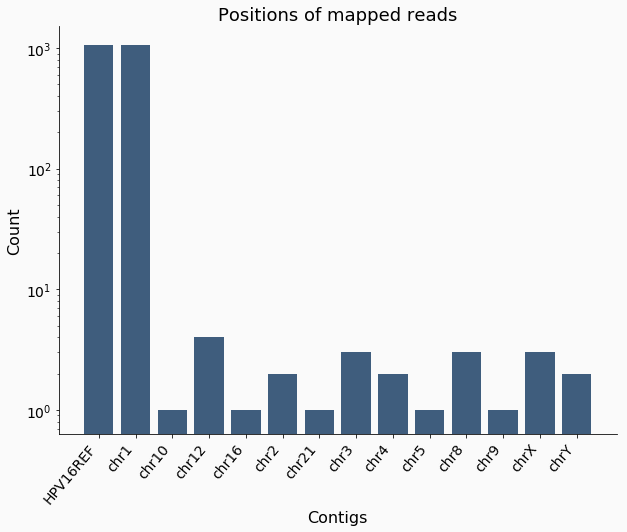

In [9]:
bp_found.plot_positions()

In [10]:
print(bp_found.clustering_breakpoints.__doc__)

 Generate a clustering with bpstart_human and with bpstart_virus.

        :params int human_thd: maximal distance between two human breakpoint
                               start.
        :params int virus_thd: maximal distance between two virus breakpoint
                               start.

        Add 'human_clust' and 'virus_clust' in dataframe.
        


In [11]:
bp_found.clustering_breakpoints(human_thd=1, virus_thd=1)

2018-08-10 13:45:13 - INFO     They are 6 different breakpoints in human genome.
2018-08-10 13:45:13 - INFO     They are 11 different breakpoints in virus genome.


In [12]:
bp_found.summarize_human_clustering()

,name,chromosome,median_bpstart_human,max_end_human,strand_human,median_bpstart_virus,max_end_virus,number_of_read
0,"(chr1, 0.0, 3)",chr1,236260508.0,236270072,-,4042.0,7846,1042
1,"(chr1, 0.0, 4)",chr1,236260508.0,236267206,-,4064.5,7846,22


In [13]:
bp_found.get_bp_in_cluster(0)

,chromosome,bpstart_human,end_human,strand_human,virus_contig,bpstart_virus,end_virus,strand_virus,read,human_clust,virus_clust
0,chr1,236260508,236263773,-,HPV16REF,4045,5901,+,m54063_170105_132732/10093272/0_5208,0.0,3
1,chr1,236260508,236263778,-,HPV16REF,4042,6388,+,m54063_170105_132732/10093272/18137_24692,0.0,3
2,chr1,236260509,236263779,-,HPV16REF,4042,6368,+,m54063_170105_132732/10093272/5252_11645,0.0,3
3,chr1,236260510,236267003,-,HPV16REF,4045,4491,+,m54063_170105_132732/10224397/0_6930,0.0,3
4,chr1,236260508,236264633,-,HPV16REF,4053,4954,+,m54063_170105_132732/10289682/0_5146,0.0,3
5,chr1,236260509,236263008,-,HPV16REF,4042,5079,+,m54063_170105_132732/10290033/0_4523,0.0,3
6,chr1,236260508,236261756,-,HPV16REF,4042,5089,+,m54063_170105_132732/10290033/4567_7126,0.0,3
7,chr1,236260508,236262505,-,HPV16REF,4042,5064,+,m54063_170105_132732/10290071/5945_9127,0.0,3
8,chr1,236260508,236262103,-,HPV16REF,4043,5754,+,m54063_170105_132732/10355075/8241_11607,0.0,3
9,chr1,236260513,236264598,-,HPV16REF,4042,4767,+,m54063_170105_132732/10355210/0_5033,0.0,3


In [14]:
bp_found.get_alignment_in_cluster(0)

,chr,r_start,r_end,mapq,strand,q_length,q_start,q_end
q_name,,,,,,,,
m54063_170105_132732/10093272/0_5208,HPV16REF,4045,5901,60,-,5208,0,1886
m54063_170105_132732/10093272/0_5208,chr1,236260508,236263773,60,+,5208,1890,5163
m54063_170105_132732/10093272/18137_24692,chr1,236260508,236263778,60,-,6555,41,3383
m54063_170105_132732/10093272/18137_24692,HPV16REF,4042,6388,60,+,6555,3386,5927
m54063_170105_132732/10093272/18137_24692,HPV16REF,6577,7109,60,-,6555,5925,6496
m54063_170105_132732/10093272/5252_11645,chr1,236260509,236263779,60,-,6393,43,3403
m54063_170105_132732/10093272/5252_11645,HPV16REF,4042,6368,60,+,6393,3406,5771
m54063_170105_132732/10093272/5252_11645,HPV16REF,6576,7109,60,-,6393,5803,6340
m54063_170105_132732/10224397/0_6930,chr1,236260510,236267003,60,-,6930,6,6409


#### Plot where breakpoint connections are located

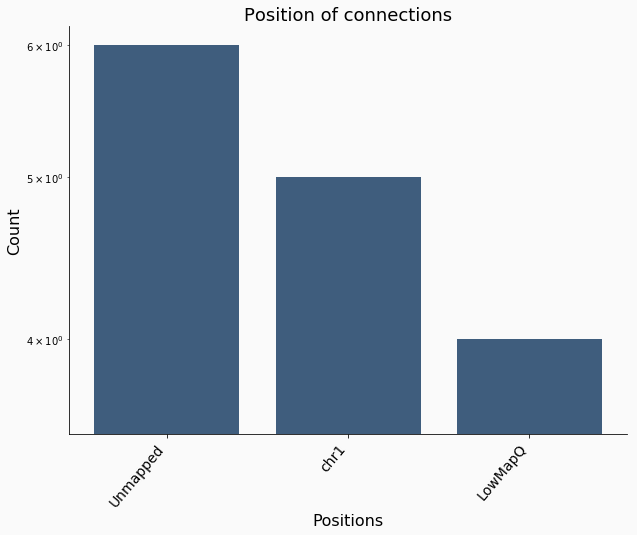

In [15]:
bp_found.plot_connections_locations(0)

In [16]:
bp_found.get_bp_connections(0)

,chromosome,bpstart_human,end_human,strand_human,virus_contig,bpstart_virus,end_virus,strand_virus,read,human_clust,virus_clust
52,chr1,236261326,236260508,+,HPV16REF,973,1513,+,m54063_170105_132732/12387219/0_7197,1.0,0
111,chr1,236265118,236260508,-,HPV16REF,6876,6737,+,m54063_170105_132732/15205234/10914_19154,4.0,9
225,LowMapQ,Unknown,Unknown,Unknown,HPV16REF,4046,5866,+,m54063_170105_132732/21430752/24649_31689,NaN,3
299,chr1,236318614,236317046,+,HPV16REF,7099,7846,+,m54063_170105_132732/25625102/7031_13951,5.0,10
391,LowMapQ,Unknown,Unknown,Unknown,HPV16REF,4042,5562,+,m54063_170105_132732/32243968/17240_21238,NaN,3
394,Unmapped,Unknown,Unknown,Unknown,HPV16REF,4042,5562,+,m54063_170105_132732/32243968/33388_37416,NaN,3
396,Unmapped,Unknown,Unknown,Unknown,HPV16REF,4045,5555,+,m54063_170105_132732/32243968/41446_45377,NaN,3
435,LowMapQ,Unknown,Unknown,Unknown,HPV16REF,4042,6056,+,m54063_170105_132732/34603380/21966_26995,NaN,3
555,Unmapped,Unknown,Unknown,Unknown,HPV16REF,4451,4042,+,m54063_170105_132732/42271690/2964_10201,NaN,6
613,Unmapped,Unknown,Unknown,Unknown,HPV16REF,6386,4042,+,m54063_170105_132732/4653602/0_14260,NaN,8


## PyVIF report

The `pyvif` command run a complete analyse.

```pyvif --human human.bam --virus virus.bam --output pyvif_report.html```

If the design contains control genes, a mapping on those controls can be added.

```pyvif --human human.bam --virus virus.bam --control control.bam --output pyvif_report.html```